In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from core import emulate

## Basic usage

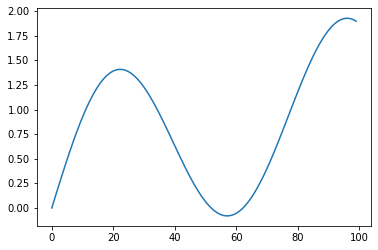

In [2]:
def test(a=1, b=1):
    x = np.linspace(0, 10, 100)
    return np.sin(a*x) + np.sin(b*x)

plt.plot(test(a=0.2, b=0.8))


In [3]:
@emulate(samples={
    'a': np.random.randn(1000),
    'b': np.random.randn(1000),
}, epoches=1000)
def test_em(a=1, b=1):
    x = np.linspace(0, 10, 100)
    return np.sin(a*x) + np.sin(b*x)

/home/yilun/scratch/emulator/core.py:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  labels = torch.as_tensor(res_list, dtype=torch.float)


Training emulator...


100%|██████████| 1000/1000 [00:18<00:00, 54.26it/s, loss=0.112]


Ave Test loss: 0.159


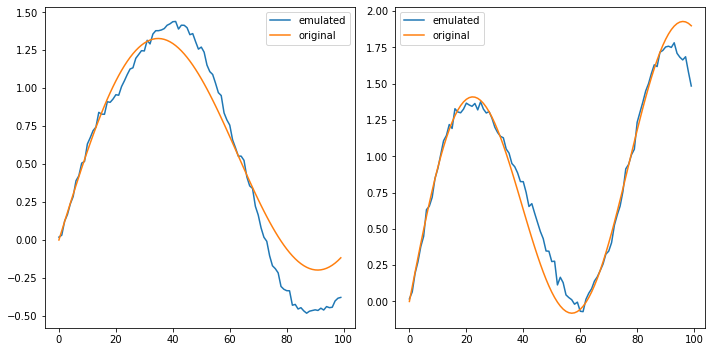

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(test_em(a=0.5, b=0.1), label="emulated")
plt.plot(test(a=0.5, b=0.1), label="original")
plt.legend()
plt.subplot(122)
plt.plot(test_em(a=0.2, b=0.8), label="emulated")
plt.plot(test(a=0.2, b=0.8), label="original")
plt.legend()
plt.tight_layout()

## Customizable options

In [5]:
train = {
    'a': np.random.randn(1000),
    'b': np.random.randn(1000),
}

Change learning rate with `lr=...`

In [6]:
@emulate(samples=train, epoches=1000, lr=0.05)
def test_em(a=1, b=1):
    x = np.linspace(0, 10, 100)
    return np.sin(a*x) + np.sin(b*x)

Training emulator...


100%|██████████| 1000/1000 [00:18<00:00, 55.51it/s, loss=0.058]


Ave Test loss: 0.109


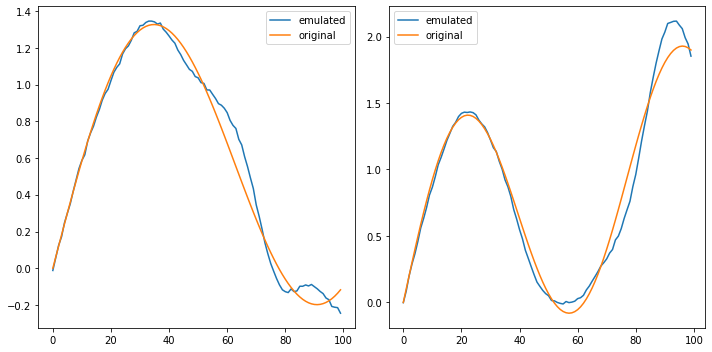

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(test_em(a=0.5, b=0.1), label="emulated")
plt.plot(test(a=0.5, b=0.1), label="original")
plt.legend()
plt.subplot(122)
plt.plot(test_em(a=0.2, b=0.8), label="emulated")
plt.plot(test(a=0.2, b=0.8), label="original")
plt.legend()
plt.tight_layout()

Change the configuration of hidden layers with `hiden=[n1, n2, ...]`. For example, `hidden=[10,10,10]` adds 3 hidden layers each with 10 nodes. 

In [14]:
@emulate(samples=train, epoches=1000, lr=0.05, hidden=[10,10,10])
def test_em(a=1, b=1):
    x = np.linspace(0, 10, 100)
    return np.sin(a*x) + np.sin(b*x)

Training emulator...


100%|██████████| 1000/1000 [00:21<00:00, 46.73it/s, loss=0.287]


Ave Test loss: 0.293


or you may want to completely replace the neural network used with `NNClass=...`

In [8]:
from torch import nn
from torch.functional import F


class MyNet(nn.Module):
    def __init__(self, size_in, size_out):
        super().__init__()
        self.fc1 = nn.Linear(size_in, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, size_out)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

@emulate(samples=train, epoches=1000, lr=0.05, NNClass=MyNet)
def test_em(a=1, b=1):
    x = np.linspace(0, 10, 100)
    return np.sin(a*x) + np.sin(b*x)

Training emulator...


100%|██████████| 1000/1000 [00:18<00:00, 55.18it/s, loss=0.363]


Ave Test loss: 0.378
